In [13]:
# Load libraries
%pylab inline 
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load dataset
url = "https://goo.gl/mLmoIz"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] 
dataset = pandas.read_csv(url, names=names)

In [10]:
print (dataset.shape)

(150, 5)


In [11]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [12]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


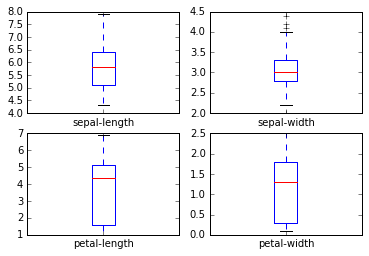

In [15]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) 
plt.show()

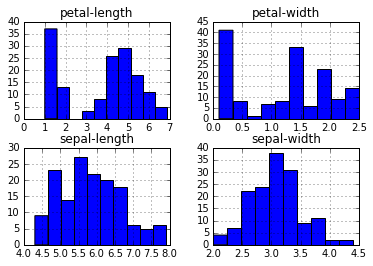

In [17]:
dataset.hist()
plt.show()

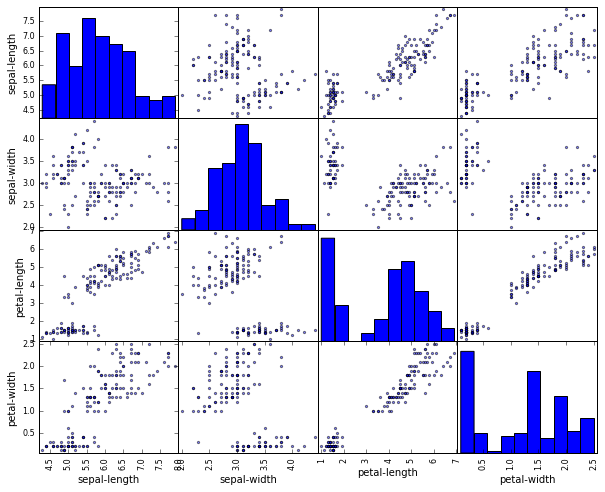

In [19]:
scatter_matrix(dataset, figsize=(10,8))
plt.show()

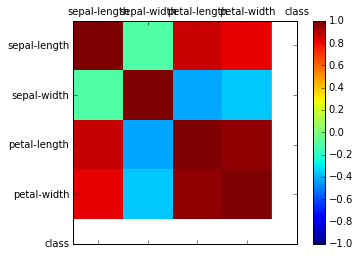

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [44]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

In [46]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train) 
seed = 7
scoring = 'accuracy'

In [48]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


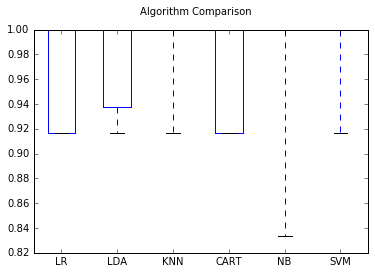

In [50]:
#Compare Algorithms
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

In [51]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



In [53]:
from IPython.display import HTML

In [54]:
HTML('<iframe src=http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data width=300 height=200></iframe>')

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

In [56]:
print x.shape
print y.shape

(150, 4)
(150,)


In [57]:
#step1 : import the class you plan to us
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#step2: instantiate the estimator (models) -- primary role is to estimate unknown quantities
knn = KNeighborsClassifier(n_neighbors = 1)

In [59]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [60]:
#step3: fit the model with data (model training) -- model is learning the relationship between x and y
# x = feature matrix and y = response vector
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
#step4: predict response for new observation -- called out of sample data
knn.predict([3,5,4,2])

/Users/Taha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [63]:
x_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(x_new)

array([2, 1])

In [64]:
#model tunning -- varying the arguments 

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x,y)

knn.predict(x_new)

array([1, 1])

In [66]:
from sklearn.linear_model import LogisticRegression

#instantiate
logreg = LogisticRegression()

#fit model
logreg.fit(x,y)

#predict
logreg.predict(x_new)

array([2, 0])

In [67]:
#evaluating models

from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

In [69]:
#logistict regression
from sklearn.linear_model import LogisticRegression

#instantiate
logreg = LogisticRegression()

#fit model
logreg.fit(x,y)

#predict
logreg.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
y_pred = logreg.predict(x)
len(y_pred)

150

In [71]:
from sklearn import metrics

print metrics.accuracy_score(y,y_pred)

0.96


In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)
y_pred = knn.predict(x)

print metrics.accuracy_score(y,y_pred)

0.966666666667


In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x,y)
y_pred = knn.predict(x)

print metrics.accuracy_score(y,y_pred)

1.0


In [75]:
#evaluation procedure 2: train/test split - use this over the evaluation above

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 4)

In [77]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred = logreg.predict(x_test)

print metrics.accuracy_score(y_test, y_pred)

0.95


In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print metrics.accuracy_score(y_test,y_pred)

0.966666666667


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print metrics.accuracy_score(y_test,y_pred)

0.983333333333


In [81]:
# looping through k values to find the right complexity

k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

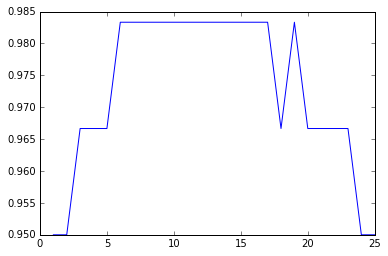

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)